In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# reading and converting img to grayscale
image_rgb = cv2.imread('circ_cab2_upscaled.jpeg')
img = cv2.imread('circ_cab2_upscaled.jpeg', cv2.IMREAD_GRAYSCALE)

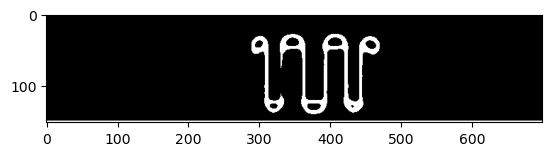

In [6]:
# Setting a threshold limit to convert all pixel below threshold to black and above to white
gray2 = np.zeros(img.shape)
gray2 [img < 210] = 255
gray2 [img > 130] = 0
plt.imshow(gray2, cmap = 'gray')

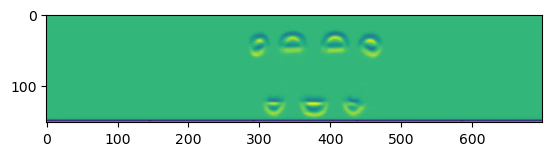

In [7]:
# output_img = output[:,pos[0]:pos[1]-1]
# for i in range(len(img_arr)):

edges = cv2.Canny(img, 100, 200)

dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, borderType=cv2.BORDER_REPLICATE)
dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, borderType=cv2.BORDER_REPLICATE)

angle = np.zeros_like(img, dtype=np.float64)

y, x = np.where(edges > 0)
angle[y, x] = np.arctan2(dy[y, x], dx[y, x])
angle_degrees = np.degrees(angle)

plt.imshow(dy)

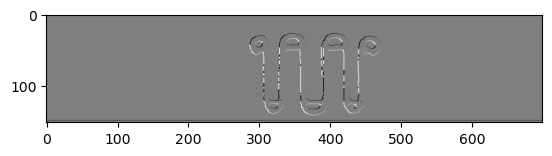

In [8]:
# Normalize angles to range [0, 1]
normalized_angles = (angle_degrees - angle_degrees.min()) / (angle_degrees.max() - angle_degrees.min())

# Scale to range [0, 255]
angle_visualization = (normalized_angles * 255).astype(np.uint8)
plt.imshow(angle_visualization, cmap='gray')

(-0.5, 699.5, 151.5, -0.5)

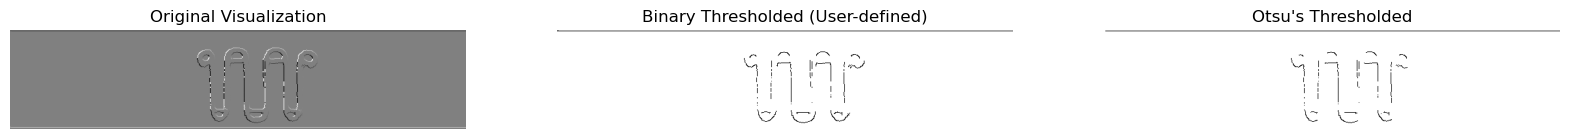

In [9]:
# User-defined threshold value
user_threshold_value = 120

# Binary thresholding
angle_visualization_inverted = cv2.bitwise_not(angle_visualization)
_, binary_thresholded = cv2.threshold(angle_visualization_inverted, user_threshold_value, 255, cv2.THRESH_BINARY)
# Otsu's thresholding
_, otsu_thresholded = cv2.threshold(angle_visualization_inverted, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plotting
plt.figure(figsize=(20, 3))

# Original visualization
plt.subplot(1, 3, 1)
plt.imshow(angle_visualization_inverted, cmap='gray')
plt.title('Original Visualization')
plt.axis('off')

# Binary thresholded image
plt.subplot(1, 3, 2)
plt.imshow(binary_thresholded, cmap='gray')
plt.title('Binary Thresholded (User-defined)')
plt.axis('off')

# Otsu's thresholded image
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title("Otsu's Thresholded")
plt.axis('off')

In [10]:
# img_arr = [binary_thresholded]
img_arr = (otsu_thresholded)

In [11]:
# Find contours
bends = []
for j in range(len(img_arr)):
  if j!=3:
    continue
  kernel = np.ones((5, 5), np.uint8)
  img_dilation = cv2.dilate(img_arr[j], kernel, iterations=1)
  contours, _ = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Convert contours to a list so we can modify it
  contours = list(contours)

  # Iterate through contours in reverse order so we can safely remove contours from the list
  for i in reversed(range(len(contours))):
      # Calculate area of contour
      area = cv2.contourArea(contours[i])
      # If area is less than 5, remove the contour from the list
      if area < 20:
          contours.pop(i)

  # Draw remaining contours on the RGB image in red
  img_arr_rgb = cv2.cvtColor(img_arr[j], cv2.COLOR_GRAY2RGB)
  contour_image = img_arr_rgb.copy()
  cv2.drawContours(contour_image, contours, -1, (255, 0,0), -1)
  bends.append(len(contours))
# for contour in contours:
#     convexHull = cv2.convexHull(contour)
#     cv2.drawContours(contour_image, [convexHull], -1, (0, 255, 0), 1)
contour_image

array([[[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 255]],

       ...,

       [[255, 255, 255]],

       [[255, 255, 255]],

       [[255, 255, 255]]], dtype=uint8)

In [12]:
bends

[0]

### Modified Code

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

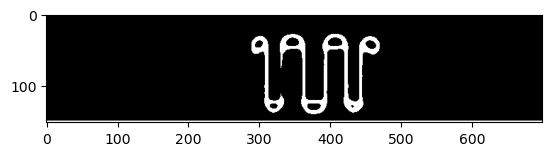

In [49]:
# Read and convert the image to grayscale
image_rgb = cv2.imread('circ_cab2_upscaled.jpeg')
img = cv2.imread('circ_cab2_upscaled.jpeg', cv2.IMREAD_GRAYSCALE)

# Thresholding
gray2 = np.zeros(img.shape)
gray2[img < 210] = 255
gray2[img > 130] = 0

plt.imshow(gray2, cmap='gray')

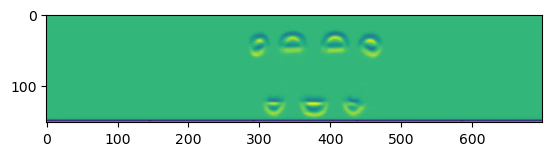

In [50]:
# Edge detection and gradient calculation
edges = cv2.Canny(img, 100, 200)
dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3, borderType=cv2.BORDER_REPLICATE)
dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3, borderType=cv2.BORDER_REPLICATE)

plt.imshow(dy)

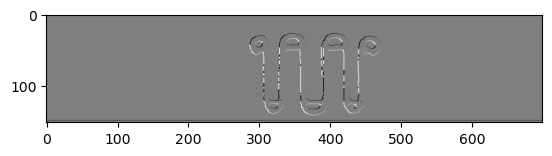

In [51]:
# Gradient angle calculation
angle = np.zeros_like(img, dtype=np.float64)
y, x = np.where(edges > 0)
angle[y, x] = np.arctan2(dy[y, x], dx[y, x])
angle_degrees = np.degrees(angle)

# Normalize and visualize gradient angles
normalized_angles = (angle_degrees - angle_degrees.min()) / (angle_degrees.max() - angle_degrees.min())
angle_visualization = (normalized_angles * 255).astype(np.uint8)

plt.imshow(angle_visualization, cmap='gray')

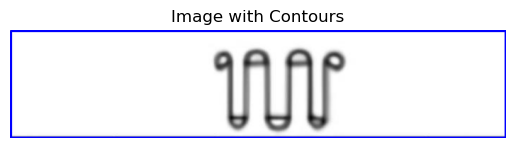

Number of bends found: 1


In [64]:
# User-defined thresholding (optional, you can use Otsu's instead)
user_threshold_value = 2
angle_visualization_inverted = cv2.bitwise_not(angle_visualization)
_, binary_thresholded = cv2.threshold(angle_visualization_inverted, user_threshold_value, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
_, otsu_thresholded = cv2.threshold(angle_visualization_inverted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Use Otsu's thresholded image for contour detection
img_arr = binary_thresholded

# Create a mask to exclude the image border
height, width = img_arr.shape
mask = np.zeros_like(img_arr)
cv2.rectangle(mask, (3, 3), (width - 5, height - 5), 255, -1)  # Filled rectangle within the border
img_arr = cv2.bitwise_and(img_arr, mask)  # Apply the mask

# Dilate the image
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(img_arr, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours (likely noise)
contours = [c for c in contours if cv2.contourArea(c) > 20]

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()

# Print the number of bends found
bends = len(contours)
print(f'Number of bends found: {bends}')


### Using a Different Approach (Hierarchical contouring)

Number of bends found:  2


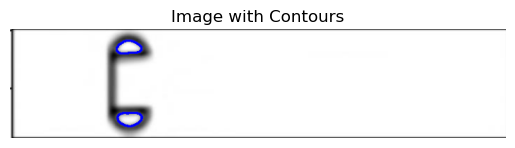

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
image_rgb = cv2.imread('circ_cab_upscaled.jpeg')
img = cv2.imread('circ_cab_upscaled.jpeg', cv2.IMREAD_GRAYSCALE)

# Thresholding to isolate the cable (adjust thresholds as needed)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to enhance the bends
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Gaussian blur to smooth out the edges
# blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# More flexible contour filtering based on hierarchy
filtered_contours = []
for i, contour in enumerate(contours):
    # Check if contour is not the outermost (hierarchy level 0)
    if hierarchy[0][i][3] != -1:
        area = cv2.contourArea(contour)
        # Only keep contours within a reasonable area range to filter out noise
        if 10 < area < 610:  # Adjust these thresholds as needed
            filtered_contours.append(contour)

print('Number of bends found: ', len(filtered_contours))

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()


Number of bends found:  7


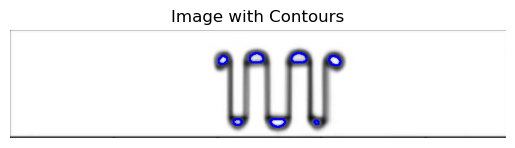

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
image_rgb = cv2.imread('circ_cab2_upscaled.jpeg')
img = cv2.imread('circ_cab2_upscaled.jpeg', cv2.IMREAD_GRAYSCALE)

# Thresholding to isolate the cable (adjust thresholds as needed)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to enhance the bends
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Gaussian blur to smooth out the edges
# blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# More flexible contour filtering based on hierarchy
filtered_contours = []
for i, contour in enumerate(contours):
    # Check if contour is not the outermost (hierarchy level 0)
    if hierarchy[0][i][3] != -1:
        area = cv2.contourArea(contour)
        # Only keep contours within a reasonable area range to filter out noise
        if 10 < area < 610:  # Adjust these thresholds as needed
            filtered_contours.append(contour)

print('Number of bends found: ', len(filtered_contours))

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()


Number of bends found:  7


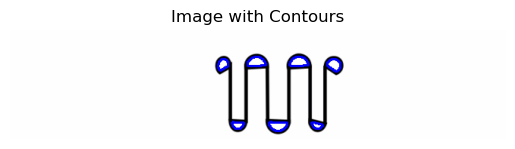

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
image_rgb = cv2.imread('circ_cab2_big.png')
img = cv2.imread('circ_cab2_big.png', cv2.IMREAD_GRAYSCALE)

# Thresholding to isolate the cable (adjust thresholds as needed)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to enhance the bends
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Gaussian blur to smooth out the edges
# blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# More flexible contour filtering based on hierarchy
filtered_contours = []
for i, contour in enumerate(contours):
    # Check if contour is not the outermost (hierarchy level 0)
    if hierarchy[0][i][3] != -1:
        area = cv2.contourArea(contour)
        # Only keep contours within a reasonable area range to filter out noise
        if 10 < area < 610:  # Adjust these thresholds as needed
            filtered_contours.append(contour)

print('Number of bends found: ', len(filtered_contours))

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()

Number of bends found:  2


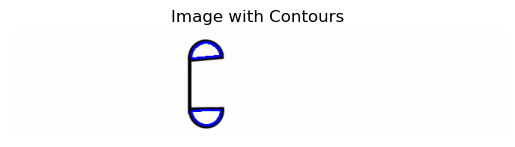

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
image_rgb = cv2.imread('circ_cab1_big.png')
img = cv2.imread('circ_cab1_big.png', cv2.IMREAD_GRAYSCALE)

# Thresholding to isolate the cable (adjust thresholds as needed)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to enhance the bends
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Gaussian blur to smooth out the edges
# blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# More flexible contour filtering based on hierarchy
filtered_contours = []
for i, contour in enumerate(contours):
    # Check if contour is not the outermost (hierarchy level 0)
    if hierarchy[0][i][3] != -1:
        area = cv2.contourArea(contour)
        # Only keep contours within a reasonable area range to filter out noise
        if 10 < area < 610:  # Adjust these thresholds as needed
            filtered_contours.append(contour)

print('Number of bends found: ', len(filtered_contours))

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()

In [114]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read and convert the image to grayscale
image_rgb = cv2.imread('Image Analytics\rect_bar_output.jpg')
img = cv2.imread('Image Analytics\rect_bar_output.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding to isolate the cable (adjust thresholds as needed)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to enhance the bends
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
eroded = cv2.erode(dilated, kernel, iterations=1)

# Apply Gaussian blur to smooth out the edges
# blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# More flexible contour filtering based on hierarchy
filtered_contours = []
for i, contour in enumerate(contours):
    # Check if contour is not the outermost (hierarchy level 0)
    if hierarchy[0][i][3] != -1:
        area = cv2.contourArea(contour)
        # Only keep contours within a reasonable area range to filter out noise
        if 10 < area < 610:  # Adjust these thresholds as needed
            filtered_contours.append(contour)

print('Number of bends found: ', len(filtered_contours))

# Draw remaining contours on the RGB version of the original image
contour_image = image_rgb.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

# Plot the final image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.axis('off')
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1022: error: (-215:Assertion failed) !src.empty() in function 'cv::dilate'
